In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 2
cur_path = os.getcwd()



In [2]:
#Retrieving the images and their labels 
count=0
for i in range(classes):
    path = os.path.join(cur_path,'cell_images',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            count=count+1
        except:
            print("Error loading image")
            print(count)



In [4]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)



In [5]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)



(27558, 30, 30, 3) (27558,)
(22046, 30, 30, 3) (5512, 30, 30, 3) (22046,) (5512,)


In [12]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/20
689/689 [==============================] - 26s 35ms/step - loss: 1.1560 - accuracy: 0.5896 - val_loss: 0.6178 - val_accuracy: 0.6620
Epoch 2/20
689/689 [==============================] - 24s 35ms/step - loss: 0.6157 - accuracy: 0.6574 - val_loss: 0.4240 - val_accuracy: 0.8128
Epoch 3/20
689/689 [==============================] - 24s 35ms/step - loss: 0.3372 - accuracy: 0.8548 - val_loss: 0.2897 - val_accuracy: 0.8784
Epoch 4/20
689/689 [==============================] - 24s 35ms/step - loss: 0.2665 - accuracy: 0.8983 - val_loss: 0.3102 - val_accuracy: 0.8768
Epoch 5/20
689/689 [==============================] - 16s 23ms/step - loss: 0.2434 - accuracy: 0.9093 - val_loss: 0.2845 - val_accuracy: 0.8813
Epoch 6/20
689/689 [==============================] - 14s 20ms/step - loss: 0.2260 - accuracy: 0.9176 - val_loss: 0.2172 - val_accuracy: 0.9144
Epoch 7/20
689/689 [==============================] - 24s 35ms/step - loss: 0.2226 - accuracy: 0.9208 - val_loss: 0.2933 - val_accuracy:

KeyboardInterrupt: 

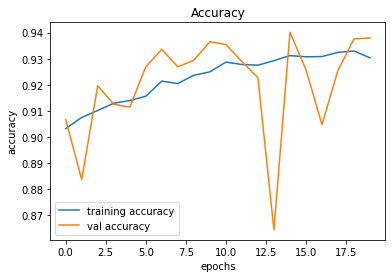

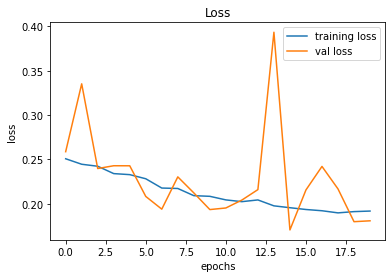

In [14]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

